# Model for predicting gender
### The task was to reconstruct the information about user’s gender from product viewing logs. The data were obtained from simulations of product viewing activities of users with known gender. 

In [1]:
import pandas as pd
import numpy as np

## Downloading data from csv files

In [2]:
product=pd.read_csv("/Users/Xenia/Downloads/product")

In [3]:
session=pd.read_csv("/Users/Xenia/Downloads/session")

In [4]:
product.head()

,session_id,sequence_order,category_a,category_b,category_c,category_d
0,u10001,1,A00001,B00001,C00001,D00001
1,u10002,1,A00002,B00002,C00002,D24897
2,u10003,1,A00002,B00002,C00002,D00002
3,u10003,2,A00002,B00002,C00003,D00003
4,u10003,3,A00002,B00002,C00007,D00007


In [5]:
session.head()

,session_id,start_time,end_time,gender
0,u10001,2014-11-14 00:02:14,2014-11-14 00:02:20,female
1,u10002,2014-12-12 14:12:05,2014-12-12 14:12:06,female
2,u10003,2014-11-14 00:02:41,2014-11-14 00:16:40,female
3,u10004,2014-11-14 00:21:55,2014-11-14 00:21:57,female
4,u10005,2014-11-14 00:26:08,2014-11-14 00:29:25,female


## Joining two table using key = session_id

In [6]:
data=product.merge(session, left_on='session_id', right_on='session_id', how='left')

In [7]:
data.head()

,session_id,sequence_order,category_a,category_b,category_c,category_d,start_time,end_time,gender
0,u10001,1,A00001,B00001,C00001,D00001,2014-11-14 00:02:14,2014-11-14 00:02:20,female
1,u10002,1,A00002,B00002,C00002,D24897,2014-12-12 14:12:05,2014-12-12 14:12:06,female
2,u10003,1,A00002,B00002,C00002,D00002,2014-11-14 00:02:41,2014-11-14 00:16:40,female
3,u10003,2,A00002,B00002,C00003,D00003,2014-11-14 00:02:41,2014-11-14 00:16:40,female
4,u10003,3,A00002,B00002,C00007,D00007,2014-11-14 00:02:41,2014-11-14 00:16:40,female


## Dealing with missing values

In [8]:
data1=data.dropna()

In [9]:
gender = data1["gender"]
categories = data1.iloc[:,2:6]
gender

0        female
1        female
2        female
3        female
4        female
          ...  
33450    female
33451    female
33452    female
33453    female
33454      male
Name: gender, Length: 33455, dtype: object

In [10]:
categories

,category_a,category_b,category_c,category_d
0,A00001,B00001,C00001,D00001
1,A00002,B00002,C00002,D24897
2,A00002,B00002,C00002,D00002
3,A00002,B00002,C00003,D00003
4,A00002,B00002,C00007,D00007
...,...,...,...,...
33450,A00002,B00002,C00007,D36051
33451,A00002,B00002,C00007,D36052
33452,A00002,B00002,C00007,D36054
33453,A00002,B00002,C00007,D08424


In [11]:
for i in range(0,categories.shape[0]):
    for j in range(0,categories.shape[1]):
         categories.values[i][j]= categories.values[i][j].lstrip('ABCD')
categories

,category_a,category_b,category_c,category_d
0,00001,00001,00001,00001
1,00002,00002,00002,24897
2,00002,00002,00002,00002
3,00002,00002,00003,00003
4,00002,00002,00007,00007
...,...,...,...,...
33450,00002,00002,00007,36051
33451,00002,00002,00007,36052
33452,00002,00002,00007,36054
33453,00002,00002,00007,08424


In [12]:
gender = gender.replace(to_replace="female", value=1)
gender = gender.replace(to_replace="male", value=0)
gender

0        1
1        1
2        1
3        1
4        1
        ..
33450    1
33451    1
33452    1
33453    1
33454    0
Name: gender, Length: 33455, dtype: int64

## Creating training and test data sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(categories, gender, test_size=0.20,random_state=0)

In [14]:
print(X_train.shape)
print(y_train.size)

(26764, 4)
26764


In [15]:
print(X_test.shape)
print(y_test.size)

(6691, 4)
6691


## Determining DecisionTree Classifier parameters

In [16]:
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

Solving environment: done

# All requested packages already installed.



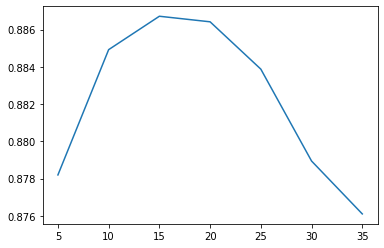

In [17]:
ilist=[5,10,15,20,25,30,35]
acc = []
for i in ilist:
    mytree = tree.DecisionTreeClassifier(max_depth=i)
    mytree.fit(X_train, y_train)
    pred_gender = mytree.predict(X_test)
    acc.append(accuracy_score(y_test,pred_gender))
plt.plot(ilist,acc)

## Creating and fitting our Decisiontree Classifier model

In [18]:
classifier = tree.DecisionTreeClassifier(max_depth=15)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_pred = classifier.predict(X_test)

## Evalueting our model's performance

In [20]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 888  510]
 [ 243 5050]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.70      1398
           1       0.91      0.95      0.93      5293

    accuracy                           0.89      6691
   macro avg       0.85      0.79      0.82      6691
weighted avg       0.88      0.89      0.88      6691



## DecisionTree Classifier

In [21]:
list_categories=['category_a','category_b','category_c','category_d']

In [22]:
export_graphviz(classifier,
                feature_names=list_categories,
                out_file="decisiontree_classifier.dot",
                class_names=['0','1'],
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)
with open("decisiontree_classifier.dot") as tree_image:
    tree_graph = tree_image.read()
graphviz.Source(tree_graph)

## Predicting a gender for a random user using session_id

In [23]:
id='u25001'

In [24]:
def data_for_gender_prediction(id):
    ex=data[data.session_id=='u25001']
    ex1=ex.iloc[:,2:6]
    ex_size=ex1.shape
    for i in range(0,ex_size[0]):
        for j in range(0,ex_size[1]):
            ex1.values[i][j]= ex1.values[i][j].lstrip('ABCD')
    return ex1

In [25]:
ex_data=data_for_gender_prediction(id)
ex_data

,category_a,category_b,category_c,category_d
33455,00002,00003,00046,01169
33456,00002,00002,00003,01457
33457,00002,00003,00014,01478


In [26]:
def predict_function(ex_data): 
    pred_ex=classifier.predict(ex_data)
    print(pred_ex)
    count_1=0
    count_0=0
    for b in pred_ex:
        if b==0:
            count_0=count_0+1
        else:
            count_1=count_1+1

    if count_0>count_1:
            gender_ex='male'
    else:
            gender_ex='female'
    return gender_ex

In [27]:
g=predict_function(ex_data)
print(g)

[1 1 1]
female


## Saving our model

In [29]:
from sklearn.externals import joblib

In [30]:
filename = '/Users/Xenia/Downloads/final_model.sav'
joblib.dump(classifier, filename)

['/Users/Xenia/Downloads/final_model.sav']

## Importing saved model and evaluating its score

In [31]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8874607681960843
